In [1]:
from google.colab import drive
drive.mount('/content/drive')
working_path = '/content/drive/MyDrive/Colab Notebooks/torchtorch/'

Mounted at /content/drive


In [ ]:
pip install fastai --upgrade

In [3]:
import os
os.chdir(working_path)

In [ ]:
pip uninstall folium

In [ ]:
pip install folium==0.2.1

In [25]:
pip install -Uqq fastbook

In [27]:
from fastbook import *

# 예시 - 2차 함수의 파라미터 찾아내기
find a,b,c<br>$f(x) = ax^2+bx+c$

In [6]:
# 파라미터가 담긴 함수
def f(t,params):
    a,b,c = params
    return a*(t**2) + (b*t) + c
# 손실함수
def mse(preds, targets):
    return ((preds-targets)**2).mean().sqrt()

In [7]:
torch.randn(3)

tensor([0.3367, 0.1288, 0.2345])

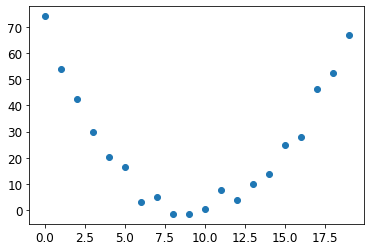

초기 손실 : 28.59050941467285
각 파리미터에 대한 그래디언트 값 : tensor([7.8994e+01, 5.1663e+00, 4.5350e-02])
각 파리미터에 대한 그래디언트 값*학습률 : tensor([3.9497e-03, 2.5831e-04, 2.2675e-06])
파라미터 : tensor([ 0.2303, -0.3278,  0.7950], requires_grad=True)
개선된 손실 : 28.28326416015625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


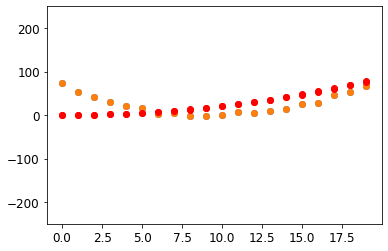

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

time = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

plt.scatter(time,speed)
plt.show()

#  파라미터 초기화, requires_grad_()메서드를 사용함으로써 그래디언트를 계산할 수 있게 만든다.
params = torch.randn(3).requires_grad_()
#  예측 계산
preds = f(time, params)
# 예측과 실제 타깃의 유사도를 그래프로 확인
def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplot()

    ax.scatter(time,speed)
    ax.scatter(time, preds.cpu().detach().numpy(), color='red')
    ax.set_ylim(-250,250)
show_preds(preds)

# 손실 계산
loss = mse(preds, speed)
print(f'초기 손실 : {loss}')
# 그래디언트 계산
loss.backward()
print(f'각 파리미터에 대한 그래디언트 값 : {params.grad}')
learning_rate = 5e-5
print(f'각 파리미터에 대한 그래디언트 값*학습률 : {params.grad*learning_rate}')
print(f'파라미터 : {params}')

# 가중치 갱신
params.data -= learning_rate*params.grad.data
params.grad = None

# 개선된 손실의 확인
preds = f(time, params)
print(f'개선된 손실 : {mse(preds, speed)}')
show_preds(preds)

In [ ]:
# 반복을 위한 함수 정의
def apply_step(params,lr, prn=True):
    preds = f(time, params)
    loss = mse(preds,speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print(loss.item())
    return preds, loss

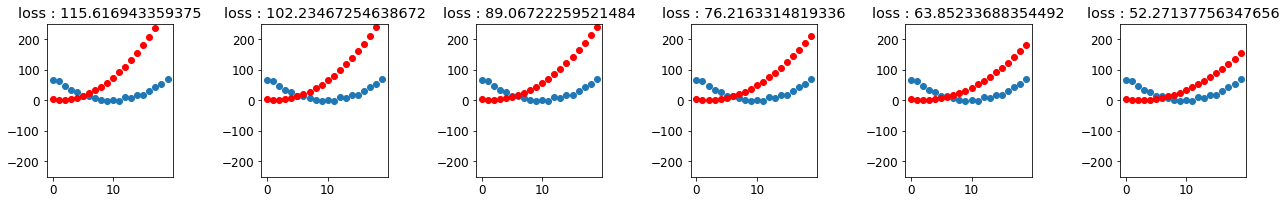

In [ ]:
np.random.seed(1234)
time = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
# 실제로 그래디언트를 계산해 개선할 부분
params = torch.from_numpy(np.random.randn(3)*2).requires_grad_()

# for i in range(10):
#     apply_step(params,1e-4)

fig,axes = plt.subplots(1,6,figsize=(18,3))
for ax in axes:
    prediction,losses = apply_step(params,5e-4,False)
    show_preds(prediction,ax)
    ax.set_title(f'loss : {losses}')
    plt.tight_layout()

# 미니배치

In [18]:
coll = range(15)
# 모든 collection에 대해 배치 크기 단위로 분할된 여러 배체에 접근하는 반복자로 만들어준다.
from torch.utils.data import DataLoader
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 1, 10, 12, 11,  9]),
 tensor([ 6,  8,  0, 14,  5]),
 tensor([ 2,  3, 13,  7,  4])]

In [19]:
# 독힙변수와 종속변수 쌍을 다루는 pytorch의 Dataset 클래스
# ex)
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [21]:
# DataLoader로 Dataset을 넣어주면 독힙변수와 종속변수 쌍을 표현한 텐서의 배치를 얻을 수 있음
dl = DataLoader(ds, batch_size=6,shuffle=True)
list(dl)

[[tensor([ 9,  7, 14,  5, 21,  4]), ('j', 'h', 'o', 'f', 'v', 'e')],
 [tensor([10, 20,  8, 18,  2, 24]), ('k', 'u', 'i', 's', 'c', 'y')],
 [tensor([15, 22, 23,  1, 16,  6]), ('p', 'w', 'x', 'b', 'q', 'g')],
 [tensor([12, 11,  3, 17, 25,  0]), ('m', 'l', 'd', 'r', 'z', 'a')],
 [tensor([13, 19]), ('n', 't')]]